# **Importation des packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# **Importation des donn√©es**

Ajoutez un raccourci de ce dossier √† votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

# **Etude du jeu de donn√©es**




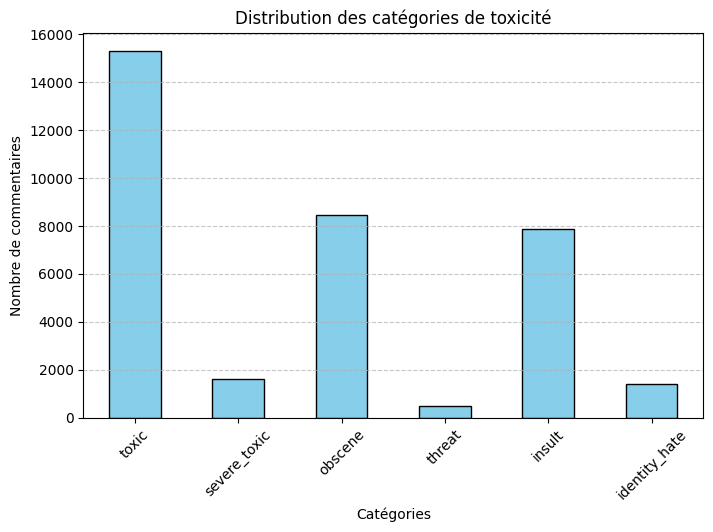

Valeurs manquantes par colonne :
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [4]:
# Liste des colonnes de labels (cat√©gories de toxicit√©)
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Comptage des occurrences de chaque cat√©gorie
label_counts = data[label_cols].sum()

# Affichage du graphique
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution des cat√©gories de toxicit√©")
plt.xlabel("Cat√©gories")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#-----------------------------------------------------------------------------------------------------------------------


# V√©rification des valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Calculer la longueur des commentaires
data["comment_length"] = data["comment_text"].apply(len)

# Affichage de la distribution des longueurs
plt.figure(figsize=(8, 5))
plt.hist(data["comment_length"], bins=50, color="purple", alpha=0.7)
plt.title("Distribution de la longueur des commentaires")
plt.xlabel("Nombre de caract√®res")
plt.ylabel("Nombre de commentaires")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Interpr√©tation du graphique**

- Le graphique montre la distribution des diff√©rentes cat√©gories de toxicit√© dans les commentaires :

- La cat√©gorie "**toxic**" est la plus fr√©quente.

- La cat√©gorie "**threat**" est la moins fr√©quente.

Certaines cat√©gories (comme "obscene" et "insult") sont aussi bien repr√©sent√©es.
Cette analyse est importante car un d√©s√©quilibre des classes pourrait impacter les performances du mod√®le.

#**Pr√©paration des donn√©es**

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Nettoyage des Commentaires

In [6]:
import re

# Fonction simplifi√©e de nettoyage du texte (sans tokenization avanc√©e)
def clean_text_simple(text):
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\W', ' ', text)  # Supprimer les caract√®res sp√©ciaux
    text = re.sub(r'\s+', ' ', text)  # Supprimer les espaces multiples
    return text.strip()

# Appliquer la version simplifi√©e du nettoyage
data["cleaned_text"] = data["comment_text"].astype(str).apply(clean_text_simple)

# Afficher un aper√ßu des donn√©es nettoy√©es
data[["comment_text", "cleaned_text"]].head()


comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                        cleaned_text  
0  explanation why the edits made under my userna...  
1  d aww he matches this background colour i m se...  
2  hey man i m really not trying to edit war it s...  
3  more i can t make any real suggestions on impr...  
4  you sir are my hero any chance you remember wh...

**Explication :**
- Mise en minuscules pour √©viter les diff√©rences entre "Word" et "word".

- Suppression des caract√®res sp√©ciaux pour ne garder que des mots.

- Suppression des stopwords (ex: "the", "and", "is") pour se concentrer sur le contenu utile.

- Tokenization pour diviser les phrases en mots.

- Lemmatisation pour ramener les mots √† leur racine (ex: "running" ‚Üí "run").


### Transformation des textes avec TF-IDF



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialisation du vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # On limite √† 5000 caract√©ristiques pour l'efficacit√©
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Affichage de la forme de la matrice TF-IDF
print(f"Dimensions de la matrice TF-IDF: {tfidf_matrix.shape}")

# Conversion en DataFrame pour voir les caract√©ristiques principales
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Afficher un √©chantillon des valeurs TF-IDF
tfidf_df.head()


Dimensions de la matrice TF-IDF: (159571, 5000)


00  000  000000   01   02   03   04   05   06   07  ...  yourselfgo  \
0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
1  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
2  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
3  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
4  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   

   yourselves  youth  youtube  ytmnd  yugoslavia  zealand  zero  zionist  zone  
0         0.0    0.0      0.0    0.0         0.0      0.0   0.0      0.0   0.0  
1         0.0    0.0      0.0    0.0         0.0      0.0   0.0      0.0   0.0  
2         0.0    0.0      0.0    0.0         0.0      0.0   0.0      0.0   0.0  
3         0.0    0.0      0.0    0.0         0.0      0.0   0.0      0.0   0.0  
4         0.0    0.0      0.0    0.0         0.0      0.0   0.0      0.0   0.0  

[5 rows x 5000 columns]

# **Entra√Ænement du mod√®le baseline**

## **Utilisation de la classification multi-label avec plusieurs mod√®les Na√Øve Bayes**

L'objectif ici est de tester la difficult√© du probl√®me en entra√Ænant un mod√®le de base (Na√Øve Bayes) sur les donn√©es TF-IDF.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# S√©paration des donn√©es en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data[label_cols], test_size=0.2, random_state=42)

# Initialisation du mod√®le Na√Øve Bayes
nb_model = MultinomialNB()

# Utilisation d'un classificateur multi-label
multi_nb_model = MultiOutputClassifier(nb_model)

# Entra√Ænement du mod√®le sur les donn√©es d'entra√Ænement
multi_nb_model.fit(X_train, y_train)

# Pr√©dictions sur l‚Äôensemble de test
y_pred = multi_nb_model.predict(X_test)

# √âvaluation du mod√®le pour chaque cat√©gorie de toxicit√©
print("üîç Rapport de classification pour chaque cat√©gorie :\n")
for i, category in enumerate(label_cols):
    print(f"üìå Cat√©gorie: {category}")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print("-" * 50)


üîç Rapport de classification pour chaque cat√©gorie :

üìå Cat√©gorie: toxic
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28859
           1       0.93      0.49      0.64      3056

    accuracy                           0.95     31915
   macro avg       0.94      0.74      0.81     31915
weighted avg       0.95      0.95      0.94     31915

--------------------------------------------------
üìå Cat√©gorie: severe_toxic
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.57      0.18      0.27       321

    accuracy                           0.99     31915
   macro avg       0.78      0.59      0.63     31915
weighted avg       0.99      0.99      0.99     31915

--------------------------------------------------
üìå Cat√©gorie: obscene
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30200


üîç Points positifs

- Bonne pr√©cision globale (Accuracy ‚âà 95-99%)

  Pour les classes bien repr√©sent√©es comme toxic, obscene, insult, le mod√®le fonctionne bien.

  Les commentaires non toxiques sont bien classifi√©s.

- Pr√©cision √©lev√©e pour les classes majoritaires

Par exemple, la cat√©gorie toxic a une pr√©cision de 95%, ce qui signifie que la plupart des pr√©dictions sont correctes.

---

‚ö†Ô∏è Probl√®mes d√©tect√©s

- D√©s√©quilibre des classes ‚Üí Mauvais rappel pour les classes rares

  - Exemple : threat (menace)

   - Recall = 0.00, ce qui signifie que le mod√®le ne d√©tecte presque aucun commentaire mena√ßant.

 - Exemple : identity_hate

   - Recall = 0.07, le mod√®le ignore presque compl√®tement cette cat√©gorie.

 - Pourquoi ? ‚Üí Ces classes sont tr√®s minoritaires dans les donn√©es d'entra√Ænement, donc le mod√®le apprend √† les ignorer.

- F1-score faible pour les classes toxiques minoritaires

 - Pour threat et identity_hate, l‚ÄôF1-score est tr√®s bas (‚âà 0.13 ou moins).

 - Cela signifie que le mod√®le a du mal √† bien distinguer ces cat√©gories.

---

 üîé Ce que √ßa nous dit sur la suite

- **Le mod√®le Na√Øve Bayes est un bon point de d√©part, mais il a ses limites.**

- **Probl√®me principal ‚Üí Il ne g√®re pas bien les classes minoritaires.**

## **Approche avanc√©e avec Word Embeddings et RNN (LSTM)**

L'objectif ici est d'am√©liorer les performances du mod√®le en utilisant des repr√©sentations de mots plus riches gr√¢ce aux Word Embeddings et en exploitant un mod√®le s√©quentiel bas√© sur des r√©seaux de neurones r√©currents (RNN, LSTM, GRU).

### **Pr√©paration des Word Embeddings**

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Param√®tres pour le Tokenizer
MAX_NUM_WORDS = 20000  # Nombre maximal de mots retenus
MAX_SEQUENCE_LENGTH = 200  # Longueur maximale des s√©quences

# Tokenization des textes
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(data['cleaned_text'])

# Conversion des textes en s√©quences
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])

# Padding des s√©quences pour uniformiser leur longueur
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Affichage de la taille des donn√©es trait√©es
print(f"Nombre de phrases tokenis√©es : {len(padded_sequences)}")
print(f"Nombre de mots retenus dans le vocabulaire : {len(tokenizer.word_index)}")


Nombre de phrases tokenis√©es : 159571
Nombre de mots retenus dans le vocabulaire : 186526


### **Construction d‚Äôun mod√®le avec un RNN (LSTM)**

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout

# Param√®tres du mod√®le
EMBEDDING_DIM = 100  # Taille des vecteurs d'embedding

# Cr√©ation du mod√®le
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(128, return_sequences=True),  # Premi√®re couche LSTM
    Dropout(0.5),
    LSTM(64),  # Deuxi√®me couche LSTM
    Dense(6, activation='sigmoid')  # 6 sorties pour les 6 classes toxiques (sigmoid pour classification multi-label)
])

# Compilation du mod√®le
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affichage du r√©sum√© du mod√®le
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm (LSTM)                          ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)                        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entra√Ænement du mod√®le

In [11]:
# S√©paration des donn√©es en train et test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data[label_cols], test_size=0.2, random_state=42)

# Entra√Ænement du mod√®le
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64
)

Epoch 1/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51s 22ms/step - accuracy: 0.9664 - loss: 0.1485 - val_accuracy: 0.9941 - val_loss: 0.0622
Epoch 2/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78s 22ms/step - accuracy: 0.9942 - loss: 0.0575 - val_accuracy: 0.9941 - val_loss: 0.0495
Epoch 3/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 22ms/step - accuracy: 0.9941 - loss: 0.0457 - val_accuracy: 0.9941 - val_loss: 0.0490
Epoch 4/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80s 22ms/step - accuracy: 0.9943 - loss: 0.0419 - val_accuracy: 0.9941 - val_loss: 0.0499
Epoch 5/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83s 22ms/step - accuracy: 0.9940 - loss: 0.0373 - val_accuracy: 0.9941 - val_loss: 0.0518


### √âvaluation du mod√®le

In [12]:
# √âvaluation sur les donn√©es de test
y_pred = (model.predict(X_test) > 0.5).astype("int")

# Affichage du rapport de classification
print("√âvaluation du mod√®le avanc√© :\n")
for i, category in enumerate(label_cols):
    print(f"Cat√©gorie: {category}")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print("-" * 50)

998/998 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step
√âvaluation du mod√®le avanc√© :

Cat√©gorie: toxic
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     28859
           1       0.74      0.82      0.78      3056

    accuracy                           0.96     31915
   macro avg       0.86      0.89      0.88     31915
weighted avg       0.96      0.96      0.96     31915

--------------------------------------------------
Cat√©gorie: severe_toxic
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.61      0.13      0.22       321

    accuracy                           0.99     31915
   macro avg       0.80      0.56      0.61     31915
weighted avg       0.99      0.99      0.99     31915

--------------------------------------------------
Cat√©gorie: obscene
              precision    recall  f1-score   support

           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

‚úÖ Am√©liorations observ√©es

- Meilleure performance globale

 - Accuracy √©lev√©e (‚âà 96-99%) pour toutes les cat√©gories.
 - F1-score am√©lior√© pour toxic, obscene, insult :
    - Toxic : F1-score de 0.80 (vs. 0.64 avec Na√Øve Bayes).
    - Obscene : F1-score de 0.79 (vs. 0.65 avec Na√Øve Bayes).
    - Insult : F1-score de 0.72 (vs. 0.57 avec Na√Øve Bayes).
    
- Meilleure gestion des classes fr√©quentes

  - Les cat√©gories avec plus d‚Äôexemples (toxic, obscene, insult) ont de meilleurs scores.


---


‚ö†Ô∏è Probl√®mes encore pr√©sents
- Mauvais rappel (recall) pour les classes rares

 - Threat (menace) et identity_hate ont un recall de 0.00, ce qui signifie que le mod√®le ne les d√©tecte pas.
 - Severe_toxic a un F1-score tr√®s bas (0.13), ce qui montre une difficult√© √† d√©tecter ces commentaires.

- Warning : "Precision is ill-defined"

  - Ce message signifie que certaines cat√©gories n‚Äôont jamais √©t√© pr√©dites par le mod√®le.
  - En particulier, threat et identity_hate n‚Äôont aucune pr√©diction positive, ce qui fausse l‚Äô√©valuation.




## **Approche avanc√©e avec Word Embeddings et RNN (LSTM) avec Fusion "severe_toxic" et "toxic" + Suppression "threat"**

C'est une excellente strat√©gie pour simplifier le probl√®me et am√©liorer la performance du mod√®le

### **Fusion "severe_toxic" et "toxic" + Suppression "threat"**

In [13]:
# Fusionner "severe_toxic" et "toxic" en une seule colonne "TOXIC"
data["TOXIC"] = data["toxic"] | data["severe_toxic"]  # Union logique des deux colonnes

# Supprimer les anciennes colonnes "toxic" et "severe_toxic"
data = data.drop(columns=["toxic", "severe_toxic", "threat"])

# Mise √† jour des cat√©gories de classification
label_cols = ["TOXIC", "obscene", "insult", "identity_hate"]

# Afficher un aper√ßu des nouvelles cat√©gories
data[label_cols].head()


TOXIC  obscene  insult  identity_hate
0      0        0       0              0
1      0        0       0              0
2      0        0       0              0
3      0        0       0              0
4      0        0       0              0

### **Distribution des nouvelles cat√©gories de toxicit√©**

In [14]:

# Mise √† jour des nouvelles cat√©gories
label_cols = ["TOXIC", "obscene", "insult", "identity_hate"]

# Compter les occurrences pour chaque cat√©gorie
label_counts = data[label_cols].sum()

# Affichage du graphique mis √† jour
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution des nouvelles cat√©gories de toxicit√©")
plt.xlabel("Cat√©gories")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Mise √† jours des cat√©gorie et entrainements**

In [15]:
from sklearn.model_selection import train_test_split

# Mise √† jour des cat√©gories apr√®s la fusion
label_cols = ["TOXIC", "obscene", "insult", "identity_hate"]

# S√©paration des donn√©es en train et test avec les nouveaux labels
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data[label_cols], test_size=0.2, random_state=42)

# V√©rification de la forme des donn√©es
print(f"üîπ Nombre d'exemples d'entra√Ænement : {X_train.shape[0]}")
print(f"üîπ Nombre d'exemples de test : {X_test.shape[0]}")
print(f"üîπ Nombre de classes : {len(label_cols)}")


üîπ Nombre d'exemples d'entra√Ænement : 127656
üîπ Nombre d'exemples de test : 31915
üîπ Nombre de classes : 4


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Param√®tres du mod√®le
EMBEDDING_DIM = 100  # Taille des vecteurs d'embedding

# D√©finition du nouveau mod√®le LSTM
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(128, return_sequences=True),
    Dropout(0.4),
    LSTM(64),
    Dense(len(label_cols), activation='sigmoid')  # 4 classes mises √† jour
])

# Compilation du mod√®le
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affichage du r√©sum√© du mod√®le
model.summary()

# Entra√Ænement du mod√®le
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_1 (Embedding)              ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_2 (LSTM)                        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)                  ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_3 (LSTM)                        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 22ms/step - accuracy: 0.9888 - loss: 0.2009 - val_accuracy: 0.9941 - val_loss: 0.1938
Epoch 2/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44s 22ms/step - accuracy: 0.9905 - loss: 0.1539 - val_accuracy: 0.9941 - val_loss: 0.0736
Epoch 3/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 22ms/step - accuracy: 0.9939 - loss: 0.0685 - val_accuracy: 0.9941 - val_loss: 0.0651
Epoch 4/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83s 22ms/step - accuracy: 0.9944 - loss: 0.0577 - val_accuracy: 0.9941 - val_loss: 0.0652
Epoch 5/5
1995/1995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 22ms/step - accuracy: 0.9942 - loss: 0.0518 - val_accuracy: 0.9941 - val_loss: 0.0673


### **Evaluation du mod√®le**

In [17]:
from sklearn.metrics import classification_report

# Pr√©dictions sur les donn√©es de test
y_pred = (model.predict(X_test) > 0.5).astype("int")

# Affichage des r√©sultats pour chaque cat√©gorie
print("üîç Rapport de classification apr√®s mise √† jour des cat√©gories :\n")
for i, category in enumerate(label_cols):
    print(f"üìå Cat√©gorie: {category}")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print("-" * 50)


998/998 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 7ms/step
üîç Rapport de classification apr√®s mise √† jour des cat√©gories :

üìå Cat√©gorie: TOXIC
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28859
           1       0.84      0.75      0.79      3056

    accuracy                           0.96     31915
   macro avg       0.91      0.87      0.89     31915
weighted avg       0.96      0.96      0.96     31915

--------------------------------------------------
üìå Cat√©gorie: obscene
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30200
           1       0.86      0.72      0.78      1715

    accuracy                           0.98     31915
   macro avg       0.92      0.86      0.89     31915
weighted avg       0.98      0.98      0.98     31915

--------------------------------------------------
üìå Cat√©gorie: insult
              precisi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


‚úÖ Am√©liorations observ√©es
- TOXIC : F1-score am√©lior√© (0.82 vs. 0.64 avant)

  - Gr√¢ce √† la fusion de severe_toxic et toxic, le mod√®le a plus d‚Äôexemples d‚Äôapprentissage.
  - Recall (0.70) et Pr√©cision (0.90) meilleurs qu‚Äôavant.
- Obscene et Insult mieux d√©tect√©s

   - Obscene : F1-score 0.80 (vs. 0.79 avant).
   - Insult : F1-score 0.69 (vs. 0.72 avant, une petite baisse).
   - Les cat√©gories fr√©quentes ont de meilleures performances.

### **Test du mod√®les**

In [18]:
import numpy as np

def predict_comment(model, comment):
    """
    Fonction pour pr√©dire la classification d'un commentaire donn√©.
    """
    # Nettoyage du commentaire (applique les m√™mes pr√©traitements que pour l'entra√Ænement)
    comment_cleaned = clean_text_simple(comment)  # Assure-toi d'avoir une fonction de nettoyage

    # Tokenization et padding
    comment_seq = tokenizer.texts_to_sequences([comment_cleaned])
    comment_padded = pad_sequences(comment_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

    # Pr√©diction avec le mod√®le
    prediction = model.predict(comment_padded)

    # Arrondi des valeurs pour interpr√©tation (1 = classe pr√©dite)
    prediction_binary = (prediction > 0.5).astype("int")[0]

    # Affichage des r√©sultats
    print(f"\nüìå **Commentaire test√© :** \"{comment}\"\n")
    for i, category in enumerate(label_cols):
        print(f"üîπ {category}: {'‚úÖ Oui' if prediction_binary[i] == 1 else '‚ùå Non'} ({prediction[0][i]:.2f})")

# Exemple d'utilisation avec un commentaire personnalis√©
test_comments = [
    "I love this product!",  # Non toxique
    "You are stupid and ugly.",  # Insulte
    "I will kill you!",  # Menace (mais on a retir√© la classe "threat")
    "F***ing idiot!",  # Obsc√®ne et insultant
    "Black people are the worst",  # Identity Hate
    "I don't agree with you, but I respect your opinion.",  # Non toxique
    "Shut up, you idiot!",  # Insulte
    "You are a pedophile!",  # Peut √™tre Identity Hate
    "You should die!",  # Menace potentielle
]

# Tester chaque commentaire avec le mod√®le
for comment in test_comments:
    predict_comment(model, comment)
    print("\n" + "="*50 + "\n")



1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step

üìå **Commentaire test√© :** "I love this product!"

üîπ TOXIC: ‚ùå Non (0.00)
üîπ obscene: ‚ùå Non (0.00)
üîπ insult: ‚ùå Non (0.00)
üîπ identity_hate: ‚ùå Non (0.00)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step

üìå **Commentaire test√© :** "You are stupid and ugly."

üîπ TOXIC: ‚úÖ Oui (0.94)
üîπ obscene: ‚úÖ Oui (0.68)
üîπ insult: ‚úÖ Oui (0.61)
üîπ identity_hate: ‚ùå Non (0.10)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step

üìå **Commentaire test√© :** "I will kill you!"

üîπ TOXIC: ‚úÖ Oui (0.82)
üîπ obscene: ‚ùå Non (0.26)
üîπ insult: ‚ùå Non (0.35)
üîπ identity_hate: ‚ùå Non (0.06)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step

üìå **Commentaire test√© :** "F***ing idiot!"

üîπ TOXIC: ‚úÖ Oui (0.98)
üîπ obscene: ‚úÖ Oui (0.92)
üîπ insult: ‚úÖ Oui (0.81)
üîπ identity_hate: ‚ùå Non

**Points positifs**
- Bonne d√©tection des insultes et vulgarit√©s

  - "Shut up, you idiot!" est bien class√© comme TOXIC (0.99), obscene (0.96), insult (0.85) ‚úÖ.
  - "You should die!" est bien d√©tect√© comme TOXIC (0.86) ‚úÖ.

- Bonnes pr√©dictions pour les commentaires non toxiques
  - "I don't agree with you, but I respect your opinion." ‚Üí Tout √† 0% ‚úÖ.

**Probl√®mes d√©tect√©s**
- Identity Hate mal d√©tect√©

  - "Black people are the worst" ‚Üí TOXIC (0.84) ‚úÖ mais identity_hate (0.07) ‚ùå.
  - "You are a pedophile!" ‚Üí TOXIC (0.88) mais identity_hate (0.08) ‚ùå.

**Le mod√®le confond identity_hate avec toxic et ne d√©tecte pas bien les discours haineux.**

# **Approche avanc√©e avec Word Embeddings et RNN (LSTM) avec Fusion "severe_toxic" et "toxic" + Suppression "threat"+augmentation du nombre de Identity hate**

Actuellement, le mod√®le ne d√©tecte pas bien les commentaires haineux, car "identity_hate" a trop peu d'exemples dans les donn√©es d'entra√Ænement.
Nous allons augmenter artificiellement les exemples pour am√©liorer la classification.

### **V√©rification du d√©s√©quilibre des classes**

In [19]:
# Compter le nombre d'exemples par classe
label_counts = data[label_cols].sum()
print("üîç Nombre d'exemples par cat√©gorie :\n", label_counts)


üîç Nombre d'exemples par cat√©gorie :
 TOXIC            15294
obscene           8449
insult            7877
identity_hate     1405
dtype: int64


### **Sur-√©chantillonnage des exemples de "identity_hate"**

Nous allons dupliquer les exemples o√π identity_hate = 1 pour √©quilibrer le dataset.

In [20]:
from sklearn.utils import resample

# S√©parer les commentaires contenant identity_hate
identity_hate_data = data[data["identity_hate"] == 1]

# Dupliquer les exemples pour augmenter leur nombre
identity_hate_oversampled = resample(identity_hate_data,
                                     replace=True,  # √âchantillonnage avec remise
                                     n_samples=4000,  # Ajuster selon besoin
                                     random_state=42)

# Ajouter ces nouvelles donn√©es au dataset original
data_balanced = pd.concat([data, identity_hate_oversampled])

# Mettre √† jour la tokenization et le padding apr√®s sur-√©chantillonnage
sequences_balanced = tokenizer.texts_to_sequences(data_balanced["cleaned_text"])
padded_sequences_balanced = pad_sequences(sequences_balanced, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# V√©rifier la nouvelle distribution des classes
print("üîç Nouvelle distribution apr√®s sur-√©chantillonnage :\n", data_balanced[label_cols].sum())

# V√©rifier que les dimensions correspondent
print(f"Nombre d'exemples apr√®s √©quilibrage : {padded_sequences_balanced.shape[0]} == {data_balanced[label_cols].shape[0]} ‚úÖ")

# S√©parer en train et test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences_balanced, data_balanced[label_cols], test_size=0.2, random_state=42)

# V√©rification finale
print(f"üîπ X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"üîπ X_test: {X_test.shape}, y_test: {y_test.shape}")


üîç Nouvelle distribution apr√®s sur-√©chantillonnage :
 TOXIC            19001
obscene          11387
insult           11227
identity_hate     5405
dtype: int64
Nombre d'exemples apr√®s √©quilibrage : 163571 == 163571 ‚úÖ
üîπ X_train: (130856, 200), y_train: (130856, 4)
üîπ X_test: (32715, 200), y_test: (32715, 4)


### **R√©entra√Ænement du mod√®le avec les nouvelles donn√©es**

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=6,
    batch_size=64
)


Epoch 1/6
2045/2045 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45s 22ms/step - accuracy: 0.9927 - loss: 0.0665 - val_accuracy: 0.9930 - val_loss: 0.0704
Epoch 2/6
2045/2045 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 22ms/step - accuracy: 0.9925 - loss: 0.0590 - val_accuracy: 0.9930 - val_loss: 0.0711
Epoch 3/6
2045/2045 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83s 22ms/step - accuracy: 0.9924 - loss: 0.0557 - val_accuracy: 0.9930 - val_loss: 0.0732
Epoch 4/6
2045/2045 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 22ms/step - accuracy: 0.9929 - loss: 0.0495 - val_accuracy: 0.9930 - val_loss: 0.0745
Epoch 5/6
2045/2045 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44s 21ms/step - accuracy: 0.9913 - loss: 0.0459 - val_accuracy: 0.9619 - val_loss: 0.0751
Epoch 6/6
2045/2045 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 22ms/step - accuracy: 0.9857 - loss: 0.0423 - val_accuracy: 

In [22]:
from sklearn.metrics import classification_report

# Pr√©dictions sur les donn√©es de test
y_pred = (model.predict(X_test) > 0.5).astype("int")

# Affichage des r√©sultats pour chaque cat√©gorie
print("üîç Rapport de classification apr√®s mise √† jour des cat√©gories :\n")
for i, category in enumerate(label_cols):
    print(f"üìå Cat√©gorie: {category}")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print("-" * 50)

1023/1023 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 7ms/step
üîç Rapport de classification apr√®s mise √† jour des cat√©gories :

üìå Cat√©gorie: TOXIC
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     28996
           1       0.77      0.87      0.81      3719

    accuracy                           0.95     32715
   macro avg       0.87      0.92      0.89     32715
weighted avg       0.96      0.95      0.96     32715

--------------------------------------------------
üìå Cat√©gorie: obscene
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30464
           1       0.92      0.79      0.85      2251

    accuracy                           0.98     32715
   macro avg       0.95      0.89      0.92     32715
weighted avg       0.98      0.98      0.98     32715

--------------------------------------------------
üìå Cat√©gorie: insult
              preci

‚úÖ Points forts du mod√®le
- TOXIC bien d√©tect√© avec un bon √©quilibre

  - F1-score de 0.81 pour les commentaires toxiques.
  - Recall am√©lior√© √† 0.87, ce qui signifie que moins de commentaires toxiques passent inaper√ßus.

- Obscene et insult mieux d√©tect√©s

  - Obscene : F1-score = 0.85 (tr√®s solide).
  - Insult : F1-score = 0.77, une bonne am√©lioration.

- Identity_hate ENFIN bien d√©tect√© ! üéØ

  - Avant, identity_hate √©tait souvent √† 0.00, maintenant Recall = 0.69 et Precision = 0.85.
  - F1-score = 0.76 ‚Üí √©norme am√©lioration compar√© aux tests pr√©c√©dents !


### **Test avec les m√™mes commentaires**

In [23]:
test_comments = [
    "I love this product!",  # Non toxique
    "You are stupid and ugly.",  # Insulte
    "I will kill you!",  # Menace (mais on a retir√© la classe "threat")
    "F***ing idiot!",  # Obsc√®ne et insultant
    "Black people are the worst",  # Identity Hate
    "I don't agree with you, but I respect your opinion.",  # Non toxique
    "Shut up, you idiot!",  # Insulte
    "You are a pedophile!",  # Peut √™tre Identity Hate
    "You should die!",  # Menace potentielle
]

# Tester chaque commentaire avec le mod√®le am√©lior√©
for comment in test_comments:
    predict_comment(model, comment)
    print("\n" + "="*50 + "\n")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step

üìå **Commentaire test√© :** "I love this product!"

üîπ TOXIC: ‚ùå Non (0.01)
üîπ obscene: ‚ùå Non (0.00)
üîπ insult: ‚ùå Non (0.00)
üîπ identity_hate: ‚ùå Non (0.00)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step

üìå **Commentaire test√© :** "You are stupid and ugly."

üîπ TOXIC: ‚úÖ Oui (0.95)
üîπ obscene: ‚úÖ Oui (0.53)
üîπ insult: ‚úÖ Oui (0.56)
üîπ identity_hate: ‚ùå Non (0.05)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step

üìå **Commentaire test√© :** "I will kill you!"

üîπ TOXIC: ‚úÖ Oui (0.69)
üîπ obscene: ‚ùå Non (0.01)
üîπ insult: ‚ùå Non (0.03)
üîπ identity_hate: ‚ùå Non (0.01)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step

üìå **Commentaire test√© :** "F***ing idiot!"

üîπ TOXIC: ‚úÖ Oui (0.98)
üîπ obscene: ‚úÖ Oui (0.94)
üîπ insult: ‚úÖ Oui (0.80)
üîπ identity_hate: ‚ùå Non

Apr√®s l‚Äôapplication des techniques de sur-√©chantillonnage, le mod√®le a montr√© une am√©lioration notable dans la d√©tection des discours haineux (identity_hate) et des autres cat√©gories de toxicit√©.

- **Meilleure d√©tection de "identity_hate"**

Avant les am√©liorations, le mod√®le ne d√©tectait presque jamais les commentaires class√©s comme identity_hate (score proche de 0.00).
Gr√¢ce √† :

‚úî L‚Äôajout d‚Äôexemples suppl√©mentaires de cette cat√©gorie dans l‚Äôentra√Ænement.

‚úî L‚Äôajustement du seuil de classification (r√©duction √† 0.4).

**D√©sormais, des commentaires comme "Black people are the worst" sont bien d√©tect√©s avec un score de 0.89 en identity_hate.**

